## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = len(study_data['Mouse ID'])
print(number_mice)

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicates = study_data.duplicated(subset=(['Mouse ID', 'Timepoint']))
show_duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_data))

1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_stats_df = pd.DataFrame({
    'Mean': tumor_mean, 
    'Median': tumor_median, 
    'Variance': tumor_variance, 
    'Std. Deviation': tumor_std, 
    'SEM': tumor_sem
})
tumor_stats_df



,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

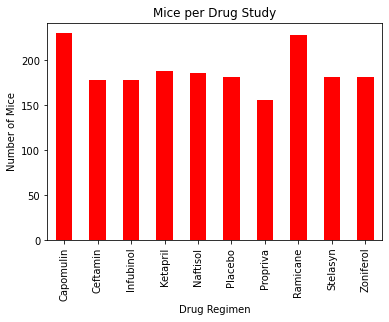

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = clean_data.groupby('Drug Regimen')['Mouse ID'].count()
mice_chart_pd = mice_count.plot(kind='bar', title='Mice per Drug Study', color='r')
mice_chart_pd.set_xlabel("Drug Regimen")
mice_chart_pd.set_ylabel("Number of Mice")

plt.savefig("Charts/pdmicecount.png")
plt.show()

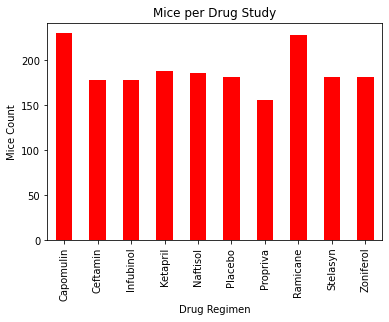

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_count))
tick_marks = [value for value in x_axis]

plt.bar(x_axis, mice_count, color='r', align='center', width=0.5)
plt.xticks(tick_marks, list(mice_count.index), rotation='vertical')

plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(mice_count)*1.05)

plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.title('Mice per Drug Study')

plt.savefig("Charts/pyplotmicechart.png")

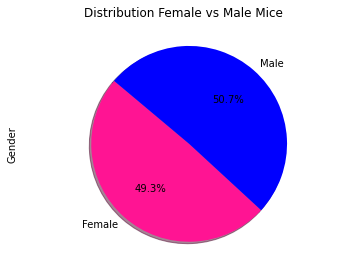

In [11]:
gender_group = clean_data.groupby('Sex')['Mouse ID'].count()
gender_count = pd.DataFrame(gender_group)

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count.plot(kind='pie', subplots=True, title="Distribution Female vs Male Mice", startangle=140,\
                        autopct='%1.1f%%',shadow=True, colors=["deeppink", "blue"], legend=False)
plt.ylabel("Gender")
plt.axis('equal')
plt.savefig("Charts/pdgenderpiechart.png")
plt.show()

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


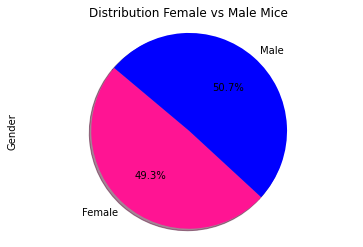

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = list(gender_count.index.values)
colors = ['deeppink', 'blue']

plt.pie(gender_count, labels=gender_labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Distribution Female vs Male Mice")
plt.ylabel('Gender')
plt.axis('equal')
plt.savefig("Charts/pyplotgenderpiechart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = clean_data[clean_data["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
four_regimens.head()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_regimens.groupby('Mouse ID')['Timepoint'].max()
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(clean_data, last_timepoint, on=("Mouse ID","Timepoint"), how="right")
final_tumor_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug ,'Tumor Volume (mm3)']
    tumor_data_list.append(tumor_data)
    
    # add subset 
    
    
# Determine outliers using upper and lower bounds
    quartiles = tumor_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(quartiles)

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64


0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64

([<matplotlib.axis.XTick at 0x7ff5f827e550>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

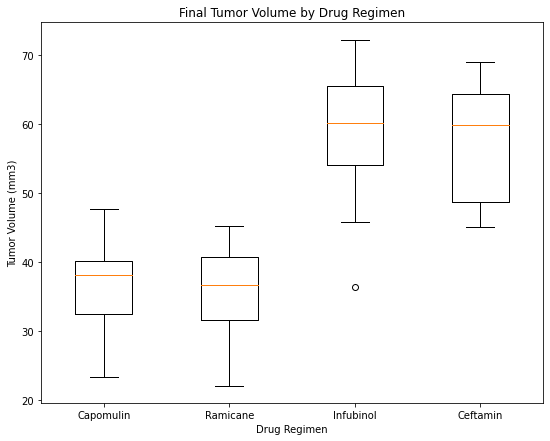

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_data_list)
plt.xticks([1,2,3,4],treatment_list)

## Line and Scatter Plots

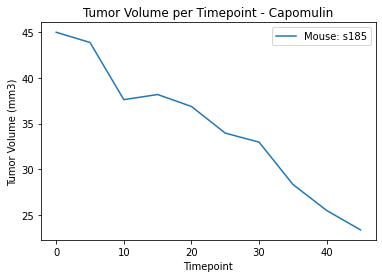

In [42]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin', :]
capomulin_mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185', :]

timepoint_capomulin = capomulin_mouse_df['Timepoint']
tumor_volume_cap = capomulin_mouse_df['Tumor Volume (mm3)']

tumor_plot, = plt.plot(timepoint_capomulin, tumor_volume_cap, label='Mouse: s185')
plt.title("Tumor Volume per Timepoint - Capomulin")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.show()

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
